# Análisis de ventas de vehículos de segunda mano

Para nuestro proyecto, decidimos hacer un analisis de los datos de publicaciones de ventas de autos usados en toda España

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
df = pd.read_csv('coches-de-segunda-mano-sample.csv')


In [ ]:
df.head()

# Preprocesamiento
Primero, eliminamos las columnas que no usaremos para acelerar el computo y reducir la cantidad de memoria utilizada

In [4]:
df.drop(columns=['url', 'company', 'country'], inplace=True)
df.head()

,make,model,version,price,price_financed,fuel,year,kms,power,doors,shift,color,photos,is_professional,dealer,province,publish_date,insert_date
0,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,NaN,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,2020-12-18 10:47:13,2021-01-15 00:00:00
1,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,82.0,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,2021-01-02 11:25:40,2021-01-15 00:00:00
2,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,100.0,4,Manual,Blanco,10,True,Auto 96,Barcelona,2020-12-16 10:51:45,2021-01-15 00:00:00
3,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,140.0,4,Manual,Blanco,9,True,Inniauto,Navarra,2020-11-25 11:09:14,2021-01-15 00:00:00
4,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,130.0,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,2021-01-12 20:00:34,2021-01-15 00:00:00


## Calculo del precio medio de venta por cada marca en la muestra

Se considera relevante para el analisis el calculo del  precio medio de venta de todas las marcas de coches con la finalidad de conseguir una visión más clara de cuáles de ellas son las más caras y más baratas en el mercado de coches de segunda mano, kilómetro cero y seminuevos. 

In [ ]:
df2 = df.groupby('make')['price'].mean()
df2a = df2.reset_index()
df2a.columns = ['marca', 'precio_medio']

In [ ]:
df2a.head()

In [ ]:
fig = px.bar(df2a, x='marca', y='precio_medio', title="Precio medio de venta de vehiculos de segunda mano en España segun la marca",
             labels={'x':'Marca', 'y':'Precio Medio'})
fig.show()

## Provincias Líderes en Adopción de Vehículos Eléctricos

Se considera igualmente importante para el análisis conocer el porcentaje de vehículos eléctricos en comparación con el total de vehículos vendidos por provincia. Esto permitirá identificar las provincias que están mostrando una mayor adopción de la compra de coches eléctricos de segunda mano.

In [5]:
# Filtrar los vehículos eléctricos
electric_cars = df[df['fuel'] == 'Eléctrico']
electric_cars.head()

,make,model,version,price,price_financed,fuel,year,kms,power,doors,shift,color,photos,is_professional,dealer,province,publish_date,insert_date
73,BMW,i3,BMW i3 5p.,15500,12900.0,Eléctrico,2016.0,49000,170.0,5,Automático,Blanco (blanco-negro),28,True,AUTOMOVILES YUMACAR S.L,Madrid,2020-12-20 19:37:42,2021-01-15 00:00:00
117,SMART,fortwo,SMART fortwo 60kW81CV EQ coupe 3p.,14500,14500.0,Eléctrico,2019.0,2000,82.0,3,Automático,Rojo,21,True,Automoviles 10 - Especialistas en Smart,Madrid,2020-12-30 05:23:08,2021-01-15 00:00:00
408,PEUGEOT,Partner,PEUGEOT Partner Furgon Confort Electric L1,23500,18500.0,Eléctrico,2020.0,10,67.0,3,Automático,Blanco,22,True,PSA Retail Orense,Orense,2021-01-14 16:56:46,2021-01-15 00:00:00
532,SMART,fortwo,SMART fortwo 60kW81CV EQ coupe 3p.,26920,25950.0,Eléctrico,2020.0,1,82.0,3,Automático,Negro,21,True,Citycar Sur,Madrid,2020-12-24 17:47:29,2021-01-15 00:00:00
630,DS,DS 3 Crossback E-Tense,DS DS 3 Crossback ETense 50 kWh Performance Li...,38102,37402.0,Eléctrico,2021.0,1,136.0,5,Automático,Gris / Plata,4,True,MAAS EXCLUSIVAS PONT,Barcelona,2021-01-14 12:25:00,2021-01-15 00:00:00


In [6]:
# Calcular el total de vehículos y los eléctricos por provincia
total_by_province = df['province'].value_counts()
total_by_province.head()

province
Madrid       9638
Barcelona    5856
Valencia     3533
Sevilla      2552
Málaga       2303
Name: count, dtype: int64

In [7]:
electric_by_province = electric_cars['province'].value_counts()
electric_by_province.head()

province
Madrid       150
Barcelona     72
Valencia      33
Vizcaya       21
Málaga        16
Name: count, dtype: int64

In [8]:
# Crear el DataFrame con los datos procesados
province_analysis = pd.DataFrame({
    'Total Vehicles': total_by_province,
    'Electric Vehicles': electric_by_province,
    'Percentage Electric': electric_by_province / total_by_province
    
})

# Rellenar valores faltantes y calcular el porcentaje
province_analysis['Electric Vehicles'] = province_analysis['Electric Vehicles'].fillna(0)
province_analysis['Percentage Electric'] = (
    province_analysis['Electric Vehicles'] / province_analysis['Total Vehicles'] * 100
)

province_analysis.head()

,Total Vehicles,Electric Vehicles,Percentage Electric
province,,,
A Coruña,993,11.0,1.107754
Albacete,375,3.0,0.800000
Alicante,2103,13.0,0.618165
Almería,481,2.0,0.415800
Asturias,864,14.0,1.620370


In [9]:
# Top 10 Provincias con mayor Porcentaje de Vehículos Eléctricos 
top_provinces = province_analysis.sort_values('Percentage Electric', ascending=False).head(10)
top_provinces.head()

,Total Vehicles,Electric Vehicles,Percentage Electric
province,,,
Segovia,120,5.0,4.166667
Zamora,121,5.0,4.132231
Álava,409,10.0,2.444988
Soria,53,1.0,1.886792
Burgos,487,9.0,1.848049


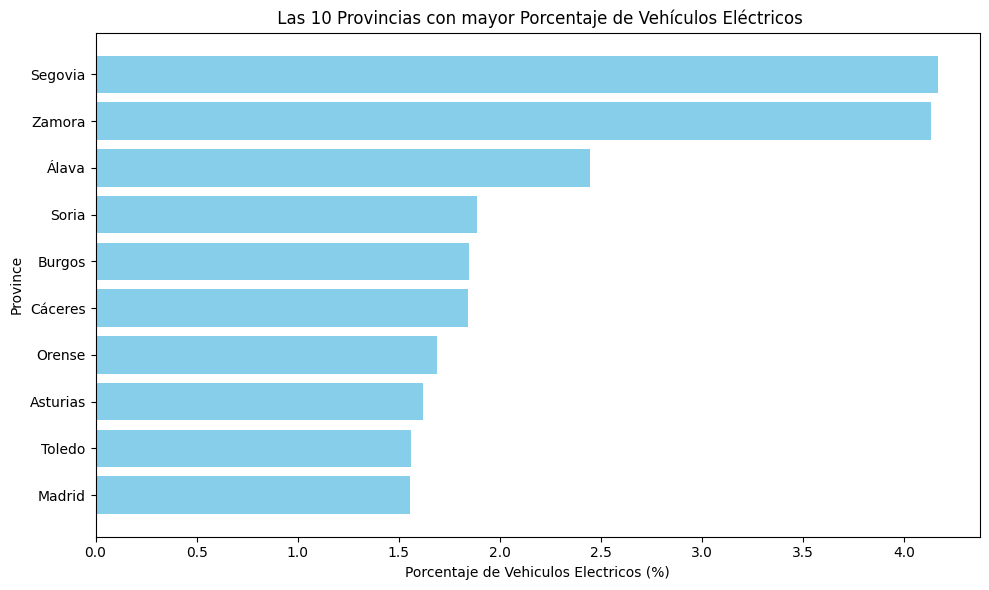

In [ ]:
# Grafico de Barras
plt.figure(figsize=(10, 6))
plt.barh(top_provinces.index, top_provinces['Percentage Electric'], color='skyblue')
plt.xlabel('Porcentaje de Vehiculos Electricos (%)')
plt.ylabel('Province')
plt.title(' Las 10 Provincias con mayor Porcentaje de Vehículos Eléctricos')
plt.gca().invert_yaxis()  # Invert eje y para mejor legibilidad
plt.tight_layout()
plt.show()

Como se puede observar el porcentaje de vehiculos electricos por provincia es sumamente pequeño lo cual estaria indicando que España al menos hasta donde esta recogida la data no tenia una buena adopcion de compra de coches electricos de segunda mano. 

### Distribución de Vehículos Eléctricos 

Para complementar lo mencionado anteriormente, es igualmente relevante analizar la distribución de coches eléctricos en las 10 provincias con el mayor porcentaje de vehículos eléctricos de segunda mano comprados.

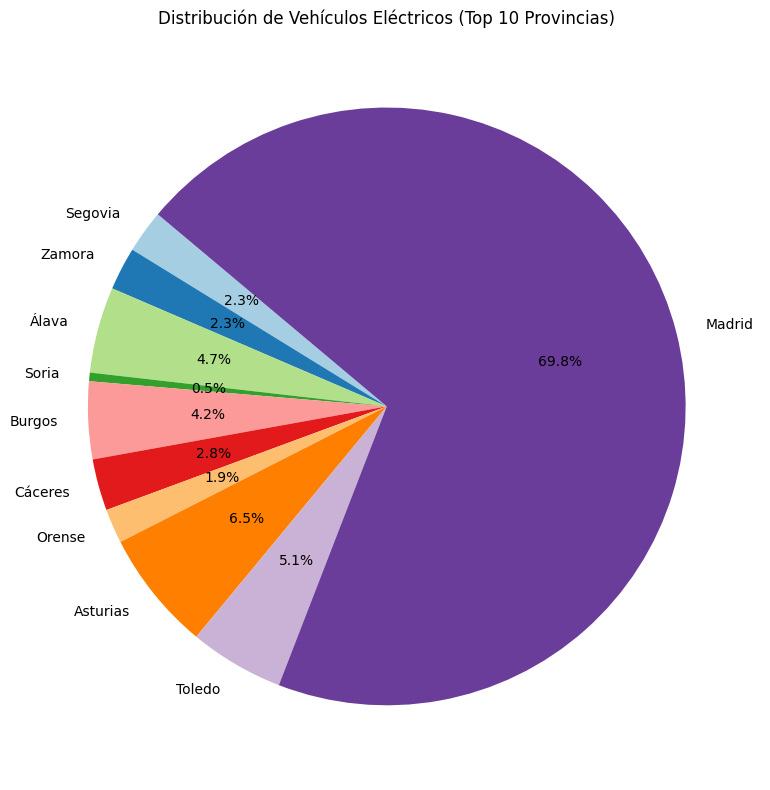

In [11]:
plt.figure(figsize=(8, 8))
plt.pie(
    top_provinces['Electric Vehicles'],
    labels=top_provinces.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Distribución de Vehículos Eléctricos (Top 10 Provincias)')
plt.tight_layout()
plt.show()

Como se puede observar en el gráfico anterior, Madrid destaca en comparación con el resto por tener el mayor porcentaje basado en la cantidad de coches eléctricos vendidos. Sin embargo, en el apartado anterior se señaló que no era una de las provincias con el mayor porcentaje de vehículos eléctricos en relación con el total de coches por provincia. Ahora queda saber como es la distribución de vehículos eléctricos en las 10 provincias con mayor cantidad de los mismos.

In [12]:
# Top 10 Provincias con mayor cantidad de Vehículos Eléctricos 
top_provinces2 = province_analysis.sort_values('Electric Vehicles', ascending=False).head(10)
top_provinces2.head()

,Total Vehicles,Electric Vehicles,Percentage Electric
province,,,
Madrid,9638,150.0,1.556339
Barcelona,5856,72.0,1.229508
Valencia,3533,33.0,0.934050
Vizcaya,1392,21.0,1.508621
Málaga,2303,16.0,0.694746


Como se puede observar en la tabla anterior los que tienen mayor cantidad de Vehículos Eléctricos  son las provincias de Madrid y Barcelona por mucho. Lo cual se puede observar en el siguiente grafico: 

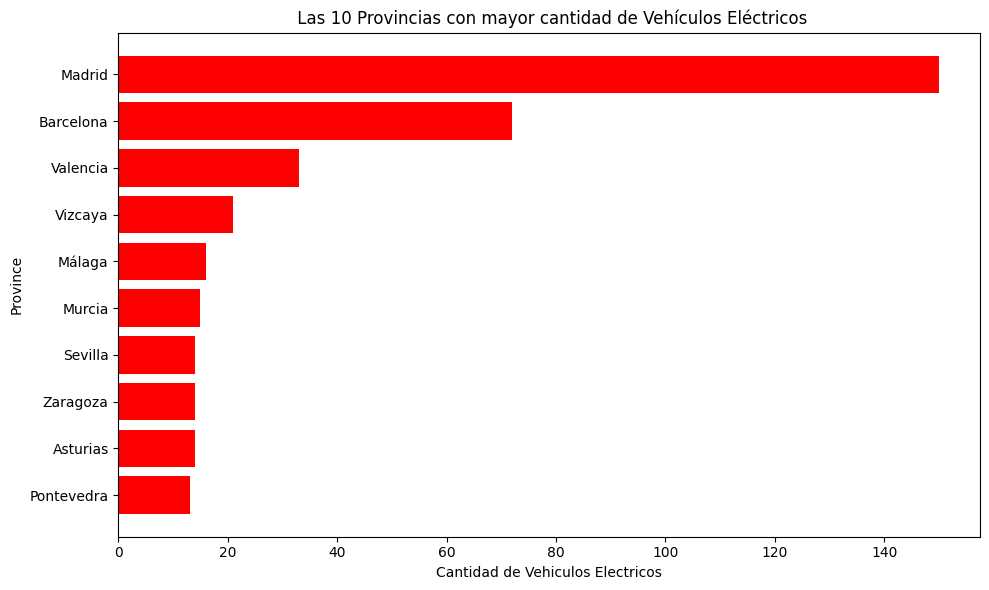

In [13]:
# Grafico de Barras
plt.figure(figsize=(10, 6))
plt.barh(top_provinces2.index, top_provinces2['Electric Vehicles'], color='red')
plt.xlabel('Cantidad de Vehiculos Electricos')
plt.ylabel('Province')
plt.title(' Las 10 Provincias con mayor cantidad de Vehículos Eléctricos')
plt.gca().invert_yaxis()  # Invert eje y para mejor legibilidad
plt.tight_layout()
plt.show()

Ahora con esto, surge la pregunta: ¿Cuánto representan las provincias de Madrid y la de Barcelona a la cantidad total de Vehículos Eléctricos  que hay en cada una de las 10 provincias?

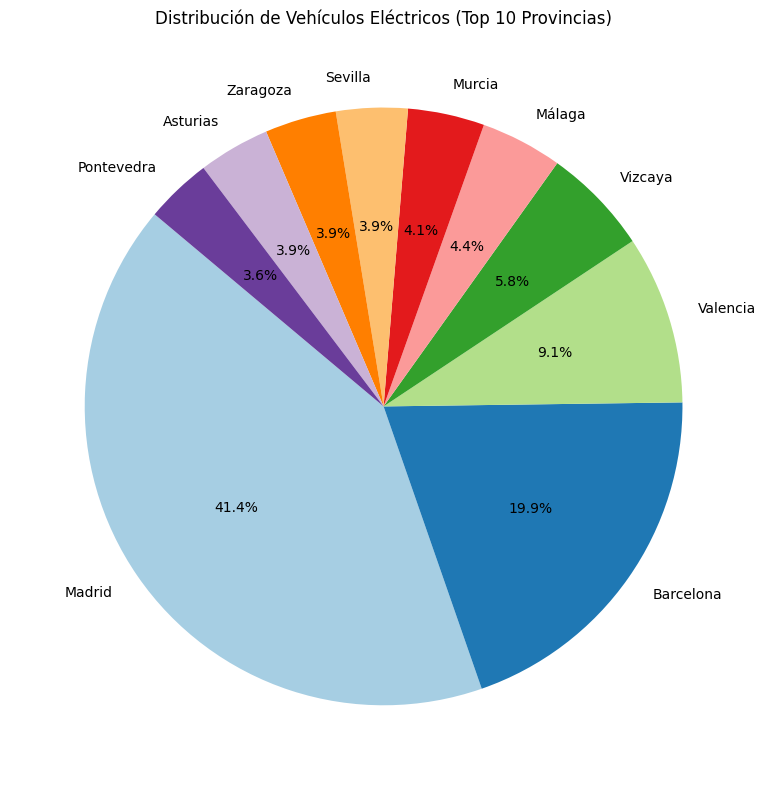

In [14]:
plt.figure(figsize=(8, 8))
plt.pie(
    top_provinces2['Electric Vehicles'],
    labels=top_provinces2.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Distribución de Vehículos Eléctricos (Top 10 Provincias)')
plt.tight_layout()
plt.show()

Se puede apreciar que Madrid junto con Barcelona abarcan un 61.3% de la cantidad de Vehículos Eléctricos de las 10 provincias con mayor numero de Vehículos Eléctricos. 